## STA7722 Assignment1 Part B 2.3
### a) There are the datasets 'gmm1.csv' and 'gmm2.csv'. Train a GMM for each dataset.
### b) There is a datasets 'gmmUknown.csv', that has data coming from either 'gmm1.csv' or 'gmm2.csv'. Which one is it and why?
### c) The dataset 'gmmUknownComposite.csv' has data from both 'gmm1.csv' and 'gmm2.csv'. Produce a plot with the support for each plot over the 1000points and where you believe there is a change of the mixture producing the data.

### Solutions:
### a) There are the datasets 'gmm1.csv' and 'gmm2.csv'. Train a GMM for each dataset.

### There are 2 clusters for gmm1 and 3 clusters for gmm2 based on the lowest AIC value.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [94]:
#read data
df1 = pd.read_csv("C:/Work/Project/STA7722/Assignment/Assgn1/gmm1.csv")
df2 = pd.read_csv("C:/Work/Project/STA7722/Assignment/Assgn1/gmm2.csv")
uk = pd.read_csv("C:/Work/Project/STA7722/Assignment/Assgn1/gmmUknown.csv")
ukc = pd.read_csv("C:/Work/Project/STA7722/Assignment/Assgn1/gmmUknownComposite.csv")

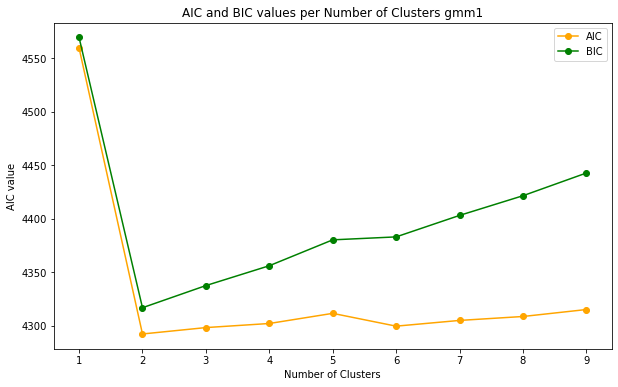

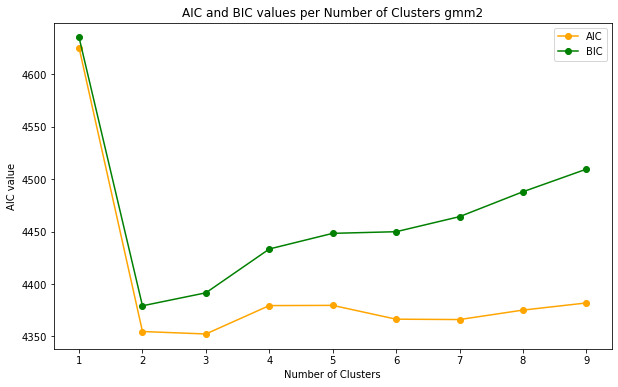

In [75]:
n_range = range(1,10)
def clusters(data, n_range,title):
    aic = []
    bic = []
    for n in n_range:
        gm = GaussianMixture(n_components=n, random_state=0)
        gm.fit(data)
        aic.append(gm.aic(data))
        bic.append(gm.bic(data))
        #plot AIC scores
    fig, ax = plt.subplots(figsize=(10,6), nrows=1)
    ax.plot(n_range, aic, '-o', color = 'orange')
    ax.plot(n_range, bic, '-o', color = 'green')
    ax.set(xlabel='Number of Clusters', ylabel='AIC value')
    ax.legend(['AIC','BIC'])
    ax.set_xticks(n_range)
    ax.set_title(title)
clusters(df1, n_range,'AIC and BIC values per Number of Clusters gmm1')
clusters(df2, n_range,'AIC and BIC values per Number of Clusters gmm2')

In [3]:
#fit gmm1
gm1 = GaussianMixture(n_components=2, random_state=0).fit(df1) #,covariance_type='full'
print("mean:")
print(gm1.means_)
print("std:")
print(np.sqrt(gm1.covariances_))

mean:
[[2.30184307]
 [6.46925329]]
std:
[[[1.26152928]]

 [[2.23355798]]]


In [4]:
#fit gmm2
gm2 = GaussianMixture(n_components=3, random_state=0).fit(df2) #,covariance_type='full'
print("mean:")
print(gm2.means_)
print("std:")
print(np.sqrt(gm2.covariances_))

mean:
[[5.93737854]
 [3.3416037 ]
 [1.12005342]]
std:
[[[1.08152539]]

 [[1.82814422]]

 [[2.85385778]]]


### b) There is a datasets 'gmmUknown.csv', that has data coming from either 'gmm1.csv' or 'gmm2.csv'. Which one is it and why?

### gmmUknown belongs to gmm2 because the distance is closer to gmm2 compared with gmm1 by using AIC value (464 vs 488) and log likelihood (-220 vs -283) based on two pretrained models on gmm1 and gmm2.

In [38]:
#fit gmmUknown
uk2 = GaussianMixture(n_components=3, random_state=0).fit(uk) #,covariance_type='full'
#clusters(uk, n_range,'AIC and BIC values per Number of Clusters gmmUnknown')
print("mean:")
print(uk2.means_)
print("std:")
print(np.sqrt(uk2.covariances_))

mean:
[[ 3.56464704]
 [ 6.04512342]
 [-0.35537861]]
std:
[[[0.98448775]]

 [[1.04764731]]

 [[1.069319  ]]]


In [70]:
#sum of loglikelihood
sum(gm1.score_samples(uk))

-282.9709637354666

In [71]:
#sum of loglikelihood
sum(gm2.score_samples(uk))

-220.31481281174837

In [10]:
gm1.aic(uk)

487.6625182642608

In [11]:
gm2.aic(uk)

463.6999905781312

### c) The dataset 'gmmUknownComposite.csv' has data from both 'gmm1.csv' and 'gmm2.csv'. Produce a plot with the support for each plot over the 1000points and where you believe there is a change of the mixture producing the data.

### I comebined 3 datasets and plot the histogram with density overlay. We can see that there are two obvious peaks on the vUnknownComposite (blackline). I trained a gmm model with 2 clusters using the combined gmm1 and gmm2 datasets. and predict the gmmUknownComposite label and get the label and proability. label 1 belongs to gmm2. label 0 belongs gmm1. We can see the scatter plot for gmm2 prediction.  The cut off value is 4.04. the points belong to gmm2 when value is over 4.04, and the rest points belong to gmm1.

In [86]:
#Combine df1 and df2
#df = pd.concat([df1,df2.rename(columns={'v2':'v1'}),ukc.rename(columns={'vUnknownComposite':'v1'})], ignore_index=True)
df = pd.concat([df1,df2,ukc], axis =1)

In [24]:
df.tail()

,v1,v2,vUnknownComposite
995,2.250978,-1.177236,6.136464
996,1.575479,4.737833,5.997531
997,7.684647,5.819119,4.915746
998,3.453344,6.876971,5.281205
999,4.433550,4.341987,7.589621


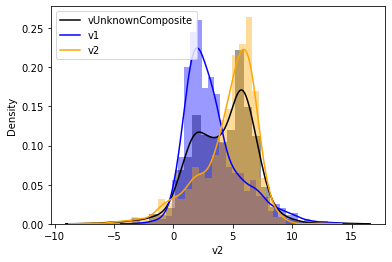

In [43]:
#plot the combined df
sns.distplot(a=df.vUnknownComposite,color='Black')
sns.distplot(a=df.v1,color='Blue')
sns.distplot(a=df.v2,color='Orange')
plt.legend(["vUnknownComposite","v1","v2"])
plt.show()

In [ ]:
#combine df1 and df2 

In [87]:
df12 = pd.concat([df1.rename(columns={'v1':'v'}),df2.rename(columns={'v2':'v'})], axis =0, ignore_index=True)

In [88]:
#train a gmm12
gmm12 = GaussianMixture(n_components=2, random_state=0).fit(df12)

In [95]:
#use this model to predict gmmUknownComposite; 
#get the predicted label 
ukc_pred = gmm12.predict(np.array(ukc))


In [96]:
#get the probability
ukc_prob = gmm12.predict_proba(ukc)

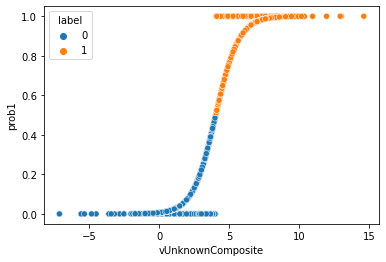

In [99]:
#plot the label and corresonding probablity
ukc['label'] = ukc_pred
ukc['prob0'] = ukc_prob[:,0]
ukc['prob1'] = ukc_prob[:,1]
sns.scatterplot(ukc.vUnknownComposite, ukc_pred,hue=ukc.label,legend = False)
sns.scatterplot(ukc.vUnknownComposite, ukc.prob1,hue=ukc.label)
plt.show()

In [110]:
#the cutoff value to predict the UnknownComposite value belongs to gmm2.
ukc[ukc['prob1']==min(ukc[ukc['label']==1]['prob1'])]

,vUnknownComposite,label,prob0,prob1
198,4.043189,1,0.498986,0.501014
